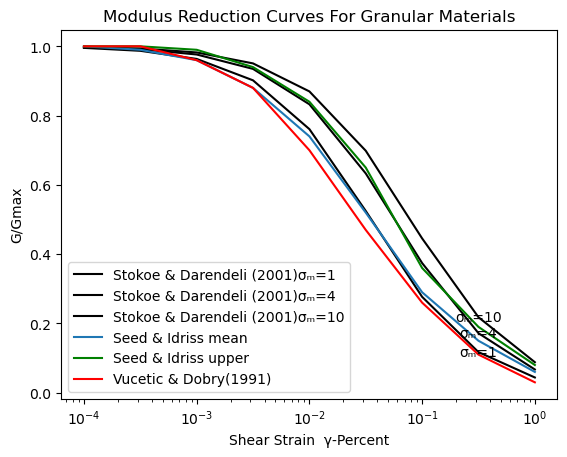

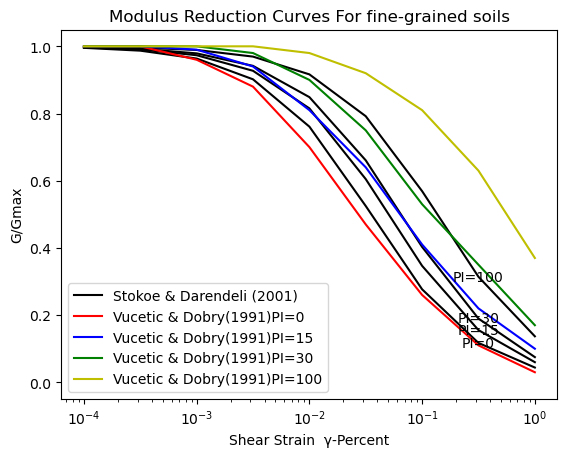

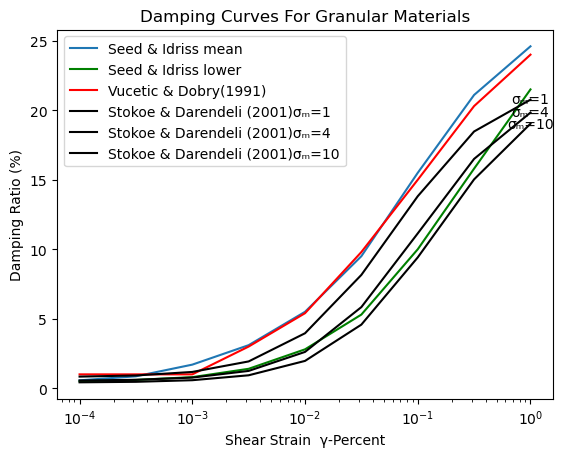

0.0352
0.0502
0.06520000000000001
0.13520000000000001


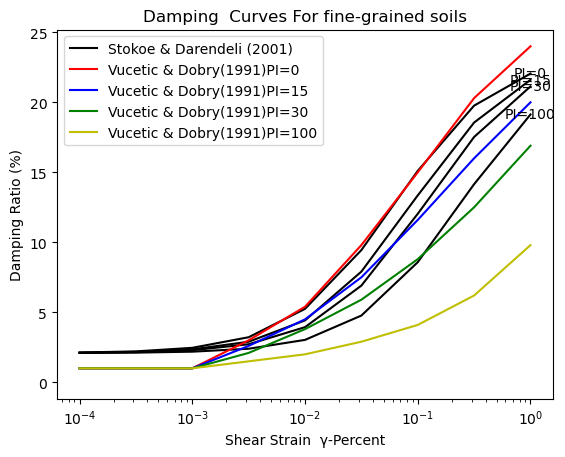

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取 Excel 文件
df = pd.read_excel('08_Modulus  Damping Curves.xlsx', header=None)
# (a)
# 选择第二列的2到10行
strain = df.iloc[1:10,1]
seed_mean=df.iloc[1:10,6]
seed_upper=df.iloc[1:10,7]
vu_pi_0=df.iloc[1:10,9]
D_seed_lower=df.iloc[12:21,3]
D_seed_mean=df.iloc[12:21,4]

a=0.92
PI=0
OCR=0
stress_m_values=[1,4,10]

R_r=[]


for stress_m in stress_m_values:
    R_r_values=((0.0352+0.001*PI*OCR**0.33)*((stress_m)**0.35))*1
    R_r.append(R_r_values)
# print(R_r)
G_Gmax=[]
for i in range(0,3):
    G_Gmax_values=1/(1+(strain/R_r[i])**a)
    G_Gmax.append(G_Gmax_values)
    plt.plot(strain,G_Gmax[i],label='Stokoe & Darendeli (2001)'+'σₘ='+str(stress_m_values[i]),color='k')
    midpoint = len(strain) // 1.01
    plt.text(strain[midpoint], G_Gmax_values[midpoint], 'σₘ='+str(stress_m_values[i]), ha='center', va='center')

#     print(G_Gmax)
# 打印结果
# print(strain)
plt.plot(strain,seed_mean,label='Seed & Idriss mean')
plt.plot(strain,seed_upper,label='Seed & Idriss upper',color='g')
plt.plot(strain,vu_pi_0,label='Vucetic & Dobry(1991)',color='r')


plt.xscale('log')

plt.xlabel('Shear Strain  γ-Percent')
plt.ylabel('G/Gmax')
plt.title('Modulus Reduction Curves For Granular Materials')
plt.legend()
plt.show()
# (b)

vu_pi_15=df.iloc[1:10,10]
vu_pi_30=df.iloc[1:10,11]
vu_pi_100=df.iloc[1:10,13]

PI_values=[0,15,30,100]
OCR=1
stress_m=1

R_r=[]



for PI in PI_values:
    R_r_values=((0.0352+0.001*PI*OCR**0.33)*(stress_m)**0.35)*1
    R_r.append(R_r_values)
# print(R_r)

for i in range(0,4):
    G_Gmax_values=1/(1+(strain/R_r[i])**a)
    G_Gmax.append(G_Gmax_values)
    plt.plot(strain,G_Gmax_values,color='k')
    midpoint = len(strain) // 1.02
    plt.text(strain[midpoint], G_Gmax_values[midpoint], 'PI='+str(PI_values[i]), ha='center', va='center')
#     print(G_Gmax[i]) 
#     print(G_Gmax_values)

plt.plot(0,0,label='Stokoe & Darendeli (2001)',color='k')
plt.plot(strain,vu_pi_0,label='Vucetic & Dobry(1991)'+'PI=0',color='r')
plt.plot(strain,vu_pi_15,label='Vucetic & Dobry(1991)'+'PI=15',color='b')
plt.plot(strain,vu_pi_30,label='Vucetic & Dobry(1991)'+'PI=30',color='g')
plt.plot(strain,vu_pi_100,label='Vucetic & Dobry(1991)'+'PI=100',color='y')

plt.xscale('log')
plt.xlabel('Shear Strain  γ-Percent')
plt.ylabel('G/Gmax')
plt.title('Modulus Reduction Curves For fine-grained soils')
plt.legend()
plt.show()

# (C)
D_vu_PI_0=df.iloc[12:21,6]
D_vu_PI_15=df.iloc[12:21,7]
D_vu_PI_30=df.iloc[12:21,8]
D_vu_PI_100=df.iloc[12:21,10]

plt.plot(strain,D_seed_mean,label='Seed & Idriss mean')
plt.plot(strain,D_seed_lower,label='Seed & Idriss lower',color='g')
plt.plot(strain,D_vu_PI_0,label='Vucetic & Dobry(1991)',color='r')
strain = df.iloc[1:10,1]

strain=pd.to_numeric(strain[0:9], errors='coerce')

PI=0
stress_m_values=[1,4,10]
OCR=1


r_R=[]    
# print(strain)
# print(np.log(strain))
for stress_m in stress_m_values:
    R_r_values=((0.0352+0.001*PI*OCR**0.33)*((stress_m)**0.35))*1
    r_R.append(R_r_values)
# print(r_R)
G_Gmax=[]
for i in range(0,3):
    G_Gmax_values=1/(1+(strain/r_R[i])**a)
    G_Gmax.append(G_Gmax_values)
#     print(G_Gmax_values)
#         plt.plot(strain,G_Gmax_values,color='k')
#         midpoint = len(strain) // 1.0
#         plt.text(strain[midpoint], G_Gmax_values[midpoint], 'PI='+str(PI_values[i]), ha='center', va='center')

    D_masing=(100/np.pi)*(4*(strain-(r_R[i]*(np.log((strain+r_R[i])/r_R[i]))))/(strain**2/(strain+r_R[i]))-2)
    D_masing=1.022*D_masing-0.00668*D_masing**2+0.0000608*D_masing**3
    D_min=(0.8+0.0129*PI*OCR**-0.1)*(stress_m_values[i])**-0.29
    Damping=(0.62*((G_Gmax_values)**0.1)*D_masing+D_min)
    plt.plot(strain,Damping,label='Stokoe & Darendeli (2001)'+'σₘ='+str(stress_m_values[i]),color='k')
    midpoint = len(strain) // 1.0
    plt.text(strain[midpoint], Damping[midpoint], 'σₘ='+str(stress_m_values[i]), ha='center', va='center')
#     print(Damping)
plt.xscale('log')
plt.xlabel('Shear Strain  γ-Percent')
plt.ylabel('Damping Ratio (%)')
plt.title('Damping Curves For Granular Materials')
plt.legend()
plt.show()

# (d)
PI_values=[0,15,30,100]
OCR=1
stress_m=1

r=[]
G=[]


for PI in PI_values:
    R_r_values=((0.0352+0.001*PI*OCR**0.33)*(stress_m)**0.35)*1
    r.append(R_r_values)
# print(R_r)

for i in range(0,4):
    G_Gmax_values=1/(1+(strain/r[i])**a)

#     plt.plot(strain,G_Gmax_values,color='k')
#     midpoint = len(strain) // 1.05
#     plt.text(strain[midpoint], G_Gmax_values[midpoint], 'PI='+str(PI_values[i]), ha='center', va='center')

    D_masing=(100/np.pi)*(4*(strain-(r[i]*(np.log((strain+r[i])/r[i]))))/(strain**2/(strain+r[i]))-2)
    D_masing=1.022*D_masing-0.00668*D_masing**2+0.0000608*D_masing**3
    D_min=(0.8+0.0129*PI*OCR**-0.1)*(stress_m)**-0.29
    Damping=(0.62*((G_Gmax_values)**0.1)*D_masing+D_min)
    plt.plot(strain,Damping,color='k')
    midpoint = len(strain) // 0.98
    plt.text(strain[midpoint], Damping[midpoint], 'PI='+str(PI_values[i]), ha='center', va='center')
    print(r[i])

plt.plot(0,0,label='Stokoe & Darendeli (2001)',color='k')
plt.plot(strain,D_vu_PI_0,label='Vucetic & Dobry(1991)'+'PI=0',color='r')
plt.plot(strain,D_vu_PI_15,label='Vucetic & Dobry(1991)'+'PI=15',color='b')
plt.plot(strain,D_vu_PI_30,label='Vucetic & Dobry(1991)'+'PI=30',color='g')
plt.plot(strain,D_vu_PI_100,label='Vucetic & Dobry(1991)'+'PI=100',color='y')

plt.xscale('log')
plt.xlabel('Shear Strain  γ-Percent')
plt.ylabel('Damping Ratio (%)')
plt.title('Damping  Curves For fine-grained soils')
plt.legend()
plt.show()

fsite_s= 1.5 Hz
fsite_r= 10.0 Hz


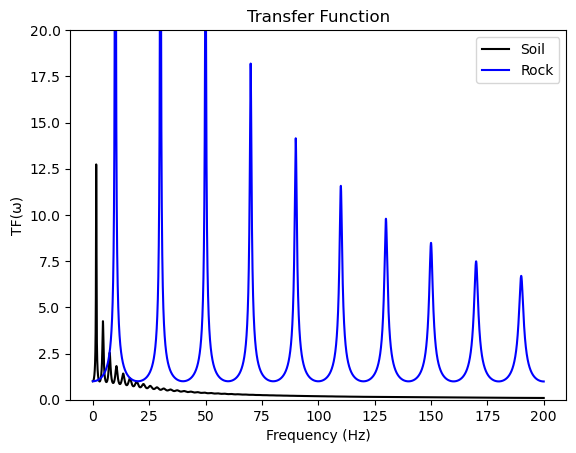

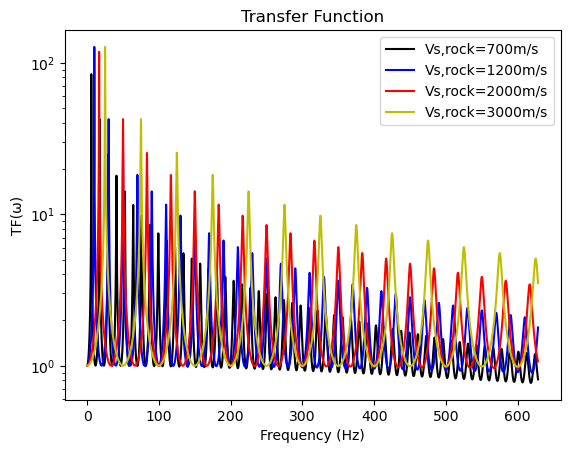

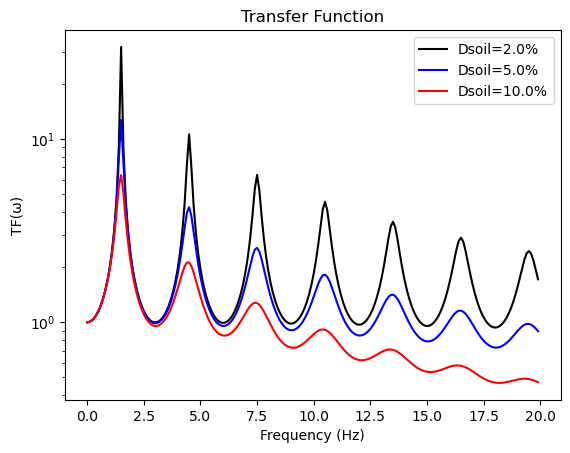

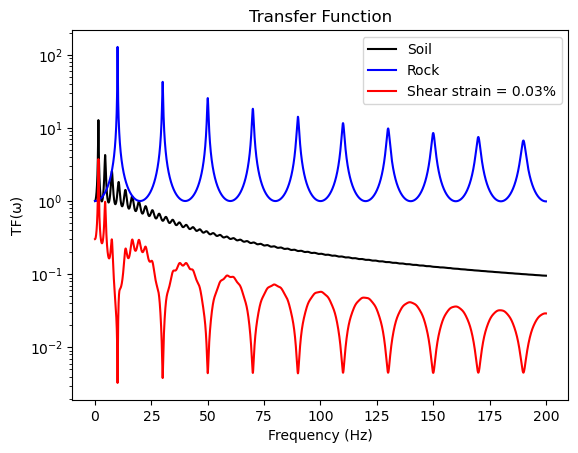

In [285]:
# 2.
i=(-1)**0.5
v_s=180
v_r=1200
H=30
f_site_s=v_s/(4*H)
f_site_r=v_r/(4*H)
D_s=0.05
D_r=0.005
rio_s=19
rio_r=22
alpha_z=rio_s*v_s/(rio_r*v_r)
TF1=[]
TF2=[]

TF_2_s=1/((np.cos(w)**2)+(D_s*w*H/v_s)**2)**0.5
TF_2_r=1/((np.cos(w)**2)+(D_r*w*H/v_r)**2)**0.5

frequency=np.arange(0, 200, 0.01)
for f in frequency:
    w=2*np.pi*f

    F1=1/((np.cos(w*H/v_s)**2)+(D_s*w*H/v_s)**2)**0.5
    F2=1/((np.cos(w*H/v_r)**2)+(D_r*w*H/v_r)**2)**0.5

    TF1.append(F1)
    TF2.append(F2)

#     print(F1.max())
TF1 = np.array(TF1)
TF2 = np.array(TF2)

# **2+(alpha_z**2*(np.sin(w*H/v_s))**2)
# 找到第一個最大值的索引
max_index1 = np.argmax(TF1)
max_index2 = np.argmax(TF2)

# 找到對應的頻率
corresponding_frequency1 = frequency[max_index1]
corresponding_frequency2 = frequency[max_index2]

print('fsite_s=',corresponding_frequency1,'Hz')
print('fsite_r=',corresponding_frequency2,'Hz')


plt.plot(frequency,TF1,color='k',label='Soil')
plt.plot(frequency,TF2,color='b',label='Rock')

# plt.yscale('log')
plt.ylim(0,20)
# plt.xlim(0,20)

plt.xlabel('Frequency (Hz)')
plt.ylabel('TF(ω)')
plt.title('Transfer Function')
plt.legend()
plt.show()
# print((f_site))

#3.
v_r=[700,1200,2000,3000]
v_s=180
H=30
f_site=v_s/(4*H)
rio_s=19
rio_r=22
alpha_z=[]
for v_r_value in v_r:
    alpha_z_values=rio_s*v_s/(rio_r*v_r_value)
    alpha_z.append(alpha_z_values)
#     print(v_r)
# print(alpha_z)
TF_2=[]
frequency=np.arange(0, 200*np.pi, 0.1)
for v_r_value in v_r:

    for f in frequency:

            w=2*np.pi*f
            F2=1/((np.cos(w*H/v_r_value)**2)+(D_r*w*H/v_r_value)**2)**0.5
            TF_2.append(F2)
#             print(v_r_value)
# print(len(frequency))
TF_2 = np.array(TF_2)

# **2+(alpha_z**2*(np.sin(w*H/v_s))**2)
# 找到第一個最大值的索引
max_index = np.argmax(TF_2)

# 找到對應的頻率
# corresponding_frequency = frequency[max_index]
# print('fsite=',corresponding_frequency,'Hz')
# for i in range(0,4):
plt.plot(frequency,TF_2[len(frequency)*0:len(frequency)*1],color='k',label='Vs,rock='+str(v_r[0])+'m/s')
plt.plot(frequency,TF_2[len(frequency)*1:len(frequency)*2],color='b',label='Vs,rock='+str(v_r[1])+'m/s')
plt.plot(frequency,TF_2[len(frequency)*2:len(frequency)*3],color='r',label='Vs,rock='+str(v_r[2])+'m/s')
plt.plot(frequency,TF_2[len(frequency)*3:len(frequency)*4],color='y',label='Vs,rock='+str(v_r[3])+'m/s')

midpoint = len(frequency) // 0.98
#     plt.text(frequency[midpoint], TF_2[midpoint], 'PI='+str(PI_values[i]), ha='center', va='center')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('TF(ω)')
plt.title('Transfer Function')
plt.legend()
plt.show()


#4.
TF_3=[]
frequency=np.arange(0, 20, 0.1)
v_s=180
v_r=1200
H=30
f_site_s=v_s/(4*H)
f_site_r=v_r/(4*H)
rio_s=19
rio_r=22
D_s=[0.02,0.05,0.10]
D_r=0.005
for D_s_value in D_s:

    for f in frequency:
            w=2*np.pi*f
            F3=1/((np.cos(w*H/v_s)**2)+(D_s_value*w*H/v_s)**2)**0.5
            TF_3.append(F3)
            
plt.plot(frequency,TF_3[len(frequency)*0:len(frequency)*1],color='k',label='Dsoil='+str(D_s[0]*100)+'%')
plt.plot(frequency,TF_3[len(frequency)*1:len(frequency)*2],color='b',label='Dsoil='+str(D_s[1]*100)+'%')
plt.plot(frequency,TF_3[len(frequency)*2:len(frequency)*3],color='r',label='Dsoil='+str(D_s[2]*100)+'%')

midpoint = len(frequency) // 0.98
#     plt.text(frequency[midpoint], TF_2[midpoint], 'PI='+str(PI_values[i]), ha='center', va='center')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('TF(ω)')
plt.title('Transfer Function')
plt.legend()
plt.show()



#5.
Gmax=0.5
D=0.1
frequency=np.arange(0, 200, 0.01)

TF_strain=np.abs(TF1/TF2)/np.sqrt((1+2*Gmax/D))
plt.plot(frequency,TF1,color='k',label='Soil')
plt.plot(frequency,TF2,color='b',label='Rock')
plt.plot(frequency,TF_strain,color='r',label='Shear strain = 0.03%')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('TF(ω)')
plt.title('Transfer Function')
plt.legend()
plt.show()
